# Homework 5
## Introduction to Data Science
### Spring 2023

`pulsar.csv` ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)) contains statistics from two types of signal from pulsar candidates: integrated profile and dispersion-measure signal-to-noise curve.

In [2]:
import pandas as pd

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8]
y = data.iloc[:,8]

from sklearn.model_selection import StratifiedShuffleSplit

# Split.
split = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in split.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


Part 1A
[3pts] For `max_depth` ranging from 1 to 20, fit decision tree classifiers using to the training data. Use `random_state=0`. Plot training vs. test accuracy.

max_depth = 1, train_acc = 0.977, test_acc = 0.978
max_depth = 2, train_acc = 0.978, test_acc = 0.978
max_depth = 3, train_acc = 0.979, test_acc = 0.978
max_depth = 4, train_acc = 0.981, test_acc = 0.977
max_depth = 5, train_acc = 0.983, test_acc = 0.978
max_depth = 6, train_acc = 0.984, test_acc = 0.977
max_depth = 7, train_acc = 0.986, test_acc = 0.976
max_depth = 8, train_acc = 0.987, test_acc = 0.975
max_depth = 9, train_acc = 0.989, test_acc = 0.975
max_depth = 10, train_acc = 0.991, test_acc = 0.975
max_depth = 11, train_acc = 0.993, test_acc = 0.974
max_depth = 12, train_acc = 0.994, test_acc = 0.973
max_depth = 13, train_acc = 0.995, test_acc = 0.973
max_depth = 14, train_acc = 0.995, test_acc = 0.972
max_depth = 15, train_acc = 0.996, test_acc = 0.971
max_depth = 16, train_acc = 0.997, test_acc = 0.969
max_depth = 17, train_acc = 0.998, test_acc = 0.969
max_depth = 18, train_acc = 0.998, test_acc = 0.969
max_depth = 19, train_acc = 0.999, test_acc = 0.969
max_depth = 20, train

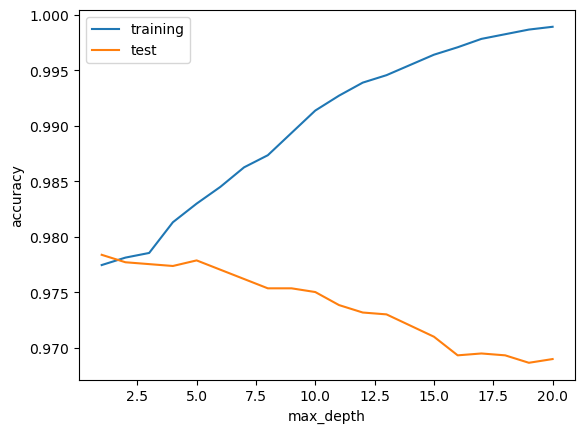

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

training_acclist = []
test_acclist = []

for max_depth in range(1, 21):
    # Train.
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)

    # Test.
    y_pred = tree.predict(X_test)
    train_acc = np.sum(tree.predict(X_train) == y_train) / len(y_train)
    training_acclist.append(train_acc)
    test_acc = np.sum(y_pred == y_test) / len(y_test)
    test_acclist.append(test_acc)
    print("max_depth = %d, train_acc = %.3f, test_acc = %.3f" % (max_depth, train_acc, test_acc))

# Plot training vs. test accuracy
plt.plot(range(1, 21), training_acclist, label="training")
plt.plot(range(1, 21), test_acclist, label="test")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()


Part 1B
[2pts] What trends do you observe in the training and test accuracies as depth increases? Explain these trends. 

### Part 1B Answer:




Answer: With the depth increase, the training accuracy increase but the test accuracy decrease. This is because when max_depth is low, the model is not learning the data enough and underfitting the training data, which cause it not generalizing well to the test data. Also, when max_depth is high, the model is overfitting the training data which makes it not generalizing well to the test data.

Part 2A
[3pts] For `n_estimators` ranging from 1 to 101 with step size 10, fit random forest classifiers to the training data. Use `random_state=0` and `max_depth=3`. Plot training vs. test accuracy.

n_estimators = 1, train_acc = 0.975, test_acc = 0.975
n_estimators = 11, train_acc = 0.977, test_acc = 0.976
n_estimators = 21, train_acc = 0.978, test_acc = 0.977
n_estimators = 31, train_acc = 0.978, test_acc = 0.977
n_estimators = 41, train_acc = 0.979, test_acc = 0.978
n_estimators = 51, train_acc = 0.979, test_acc = 0.978
n_estimators = 61, train_acc = 0.979, test_acc = 0.978
n_estimators = 71, train_acc = 0.979, test_acc = 0.978
n_estimators = 81, train_acc = 0.979, test_acc = 0.978
n_estimators = 91, train_acc = 0.979, test_acc = 0.978


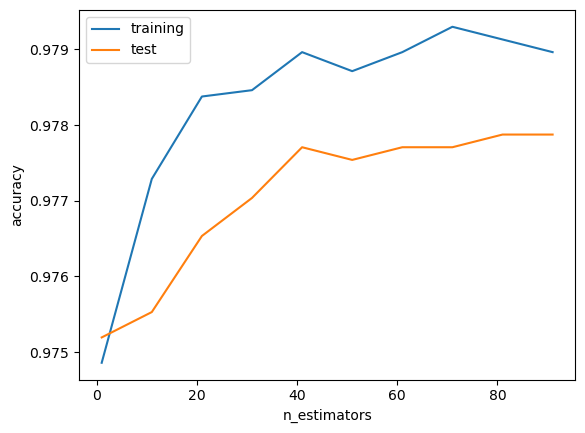

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

training_acclist = []
test_acclist = []

#step size = 10, max_depth = 3, random_state = 0
for n_estimators in range(1, 101, 10):
    # Train.
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=0)
    forest.fit(X_train, y_train)

    # Test.
    y_pred = forest.predict(X_test)
    
    train_acc = np.sum(forest.predict(X_train) == y_train) / len(y_train)
    training_acclist.append(train_acc)
    
    test_acc = np.sum(y_pred == y_test) / len(y_test)
    test_acclist.append(test_acc)
    print("n_estimators = %d, train_acc = %.3f, test_acc = %.3f" % (n_estimators, train_acc, test_acc))

# Plot training vs. test accuracy.
plt.plot(range(1, 101, 10), training_acclist, label="training")
plt.plot(range(1, 101, 10), test_acclist, label="test")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()





Part 2B
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Part 2B Answer:




Answer: With the n_estimators increase, the training accuracy and the test accuracy both increase. The training accuracy increases faster than the test accuracy. This is randon forest is the combination of multiple decision trees, and the more decision trees are used, the more accurate the model is. When the n_estimators increase to a high number, the model will overfitting the training data that will cause training accuracy increases faster than the test accuracy and will have a higher accuracy than the test accuracy.